# **Pokemon Image Classifier**


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn import preprocessing

### Link Google Drive Data Folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/PokemonData'
print("Current directory:", os.getcwd())

/content/drive/MyDrive/PokemonData
Current directory: /content/drive/MyDrive/PokemonData


### Import Pokemon image data

In [ ]:
directory = '/content/drive/MyDrive/PokemonData'
IMAGE_SIZE = 64
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [ ]:
# Converts images to NumPy arrays, does Resizing and One-Hot Encoding
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    batch_size=BATCH_SIZE,                   # Batch size for training/validation
    image_size=(IMAGE_SIZE, IMAGE_SIZE),     # Target image size
    shuffle=True,                            # Shuffle the data
    seed=42,                                 # Random seed for shuffling
)

# Initialize lists to accumulate data and labels
X = []
y = []

# Iterate through the dataset batches to accumulate data and labels
for batch_data, batch_labels in dataset:
    X.append(batch_data.numpy())
    y.append(batch_labels.numpy())

# Concatenate the accumulated batches into NumPy arrays
X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

Found 6820 files belonging to 150 classes.


In [ ]:
print("Shape of X:", X.shape)
print("First few rows of X:")
print(X[:5])

print("Shape of y:", y.shape)
print("First few rows of y:")
print(y[:5])

Shape of X: (6820, 64, 64, 3)
First few rows of X:
[[[[1.16812500e+02 1.53000000e+02 1.76906250e+02]
   [1.16000000e+02 1.52000000e+02 1.78000000e+02]
   [1.19468750e+02 1.53468750e+02 1.78468750e+02]
   ...
   [2.40000000e+01 3.20000000e+01 9.50000000e+01]
   [2.40000000e+01 3.40000000e+01 9.60000000e+01]
   [2.30000000e+01 3.40000000e+01 9.60000000e+01]]

  [[1.16812500e+02 1.53000000e+02 1.76906250e+02]
   [1.15235107e+02 1.51235107e+02 1.77235107e+02]
   [1.19391846e+02 1.53391846e+02 1.80391846e+02]
   ...
   [2.54687500e+01 3.34687500e+01 9.64687500e+01]
   [2.40000000e+01 3.40000000e+01 9.60000000e+01]
   [2.21640625e+01 3.31640625e+01 9.51640625e+01]]

  [[1.17906250e+02 1.54093750e+02 1.78000000e+02]
   [1.16000000e+02 1.50000000e+02 1.78000000e+02]
   [1.16000000e+02 1.52000000e+02 1.78000000e+02]
   ...
   [2.54687500e+01 3.40827637e+01 9.42407227e+01]
   [2.70000000e+01 3.50000000e+01 9.80000000e+01]
   [2.67265625e+01 3.47265625e+01 9.77265625e+01]]

  ...

  [[1.50000000e

In [ ]:
class_names = dataset.class_names   # Create a list of Pokemon classes
class_names

['Abra',
 'Aerodactyl',
 'Alakazam',
 'Alolan Sandslash',
 'Arbok',
 'Arcanine',
 'Articuno',
 'Beedrill',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Butterfree',
 'Caterpie',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Clefable',
 'Clefairy',
 'Cloyster',
 'Cubone',
 'Dewgong',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Dragonair',
 'Dragonite',
 'Dratini',
 'Drowzee',
 'Dugtrio',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Farfetchd',
 'Fearow',
 'Flareon',
 'Gastly',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Growlithe',
 'Gyarados',
 'Haunter',
 'Hitmonchan',
 'Hitmonlee',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Kingler',
 'Koffing',
 'Krabby',
 'Lapras',
 'Lickitung',
 'Machamp',
 'Machoke',
 'Machop',
 'Magikarp',
 'Magmar',
 'Magnemite',
 'Magneton',
 'Mankey',
 'Marowak',
 '

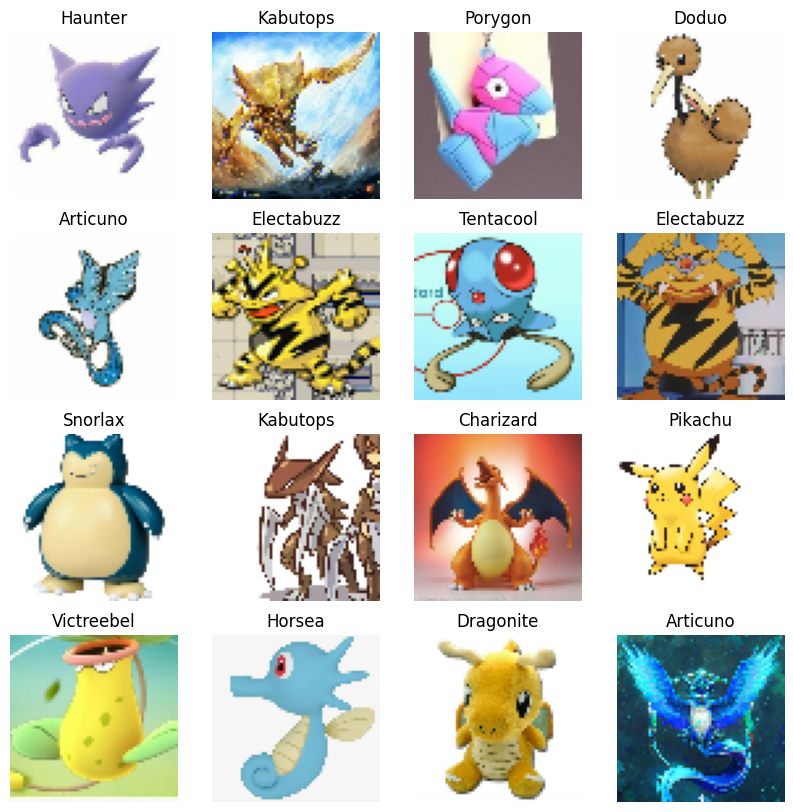

In [ ]:
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

### Split Samples into Train and Test

In [ ]:
import random
import shutil

In [ ]:
# Get a list of all image filenames in the total_data_dir
image_filenames = os.listdir(directory)
print(image_filenames)

['Cubone', 'Nidorina', 'Charizard', 'Dragonite', 'Farfetchd', 'Nidoqueen', 'Nidorino', 'Lickitung', 'Rhydon', 'Poliwhirl', 'Dratini', 'Slowbro', 'Exeggcute', 'Jynx', 'Arbok', 'MrMime', 'Hitmonlee', 'Mew', 'Venomoth', 'Paras', 'Electabuzz', 'Dewgong', 'Kakuna', 'Wartortle', 'Nidoking', 'Grimer', 'Golem', 'Caterpie', 'Tangela', 'Ekans', 'Parasect', 'Growlithe', 'Pidgey', 'Meowth', 'Tauros', 'Dodrio', 'Ponyta', 'Exeggutor', 'Psyduck', 'Persian', 'Tentacool', 'Geodude', 'Horsea', 'Slowpoke', 'Poliwrath', 'Machoke', 'Bulbasaur', 'Oddish', 'Omastar', 'Lapras', 'Ditto', 'Porygon', 'Wigglytuff', 'Koffing', 'Pidgeot', 'Dugtrio', 'Machop', 'Raticate', 'Vulpix', 'Haunter', 'Seadra', 'Weezing', 'Golduck', 'Blastoise', 'Kabutops', 'Hitmonchan', 'Rhyhorn', 'Golbat', 'Aerodactyl', 'Moltres', 'Raichu', 'Fearow', 'Magnemite', 'Kabuto', 'Electrode', 'Metapod', 'Mewtwo', 'Pidgeotto', 'Ninetales', 'Beedrill', 'Butterfree', 'Starmie', 'Vaporeon', 'Drowzee', 'Kangaskhan', 'Krabby', 'Chansey', 'Ivysaur', 'Sa

In [ ]:
y_one_hot_pca = to_categorical(y, num_classes=150)
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot_pca, test_size=0.15, random_state=42)

### Compute Feature Extraction Using PCA

In [ ]:
from sklearn.decomposition import PCA
from time import time

In [ ]:
X_pca = np.array(X).reshape((-1, 64 * 64 * 3)) # reshaped to 1D for PCA
print(X_pca[:5])
X_train_pca = np.array(X_train).reshape((-1, 64 * 64 * 3)) # reshaped to 1D for PCA
X_test_pca = np.array(X_test).reshape((-1, 64 * 64 * 3)) # reshaped to 1D for PCA

[[116.8125   153.       176.90625  ...  39.088623  80.08862  146.08862 ]
 [252.75     252.75     252.75     ... 254.       254.       254.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [254.       254.       254.       ... 254.       254.       254.      ]
 [ 54.        54.        54.       ...  37.        37.        37.      ]]


In [ ]:
print('Computing PCA...')
t0 = time()

pca = PCA(n_components=0.80)
pca.fit(X_pca)  # Assuming X is your dataset

Computing PCA...


PCA(n_components=0.8)

In [ ]:
X_train_pca = pca.transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

print('PCA Computed: {}'.format(time() - t0))

print(X_train_pca.shape)
print(X_test_pca.shape)

PCA Computed: 90.41077613830566
(5797, 114)
(1023, 114)


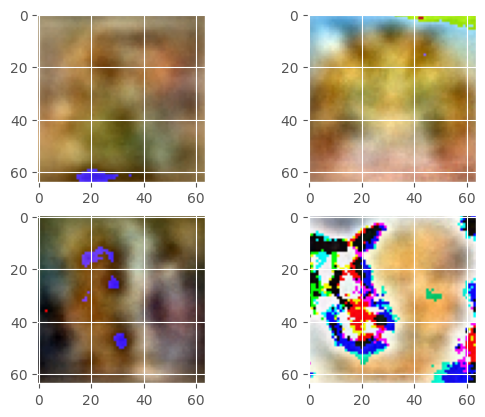

In [ ]:
XInv = pca.inverse_transform(X_train_pca)
XInv = XInv.reshape((-1, 64, 64, 3))

f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(XInv[0].astype('uint8'))
axarr[0, 1].imshow(XInv[1].astype('uint8'))
axarr[1, 0].imshow(XInv[2].astype('uint8'))
axarr[1, 1].imshow(XInv[3].astype('uint8'))

plt.show()

### Training Support Vector Machine Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': [1, 1e3, 5e3, 1e4, 5e4, 1e5],
}

print('Training...')
t0 = time()

# Create a GridSearchCV instance with cross-validation
clf = GridSearchCV(SVC(), param_grid)
# Fit the classifier on the PCA-transformed training data
clf.fit(X_train_pca, y_train)

print('Training Duration: {}'.format(time() - t0))

# Print the best hyperparameters found during grid search
print('Best hyperparameters:', clf.best_params_)

Training...
Training Duration: 486.08949279785156
Best hyperparameters: {'C': 5000.0, 'kernel': 'rbf'}


In [ ]:

# Evaluate the classifier on the test set
accuracy_test = clf.score(X_test_pca, y_test)
print('Accuracy on test set:', accuracy_test)

# Flatten each image to a 1D array
X_test_flattened_svm = X_test_pca.reshape(X_test_pca.shape[0], -1)

pred_svm = clf.predict(X_test_flattened_svm)
print(classification_report(y_test, pred_svm))

Accuracy on test set: 0.38220918866080156
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         3
           3       1.00      0.50      0.67         6
           4       0.56      0.56      0.56         9
           5       0.33      0.12      0.18         8
           6       0.50      0.33      0.40         6
           7       0.20      0.17      0.18         6
           8       0.00      0.00      0.00         1
           9       0.29      0.29      0.29         7
          10       0.62      1.00      0.77         5
          11       0.50      0.25      0.33         4
          12       0.75      0.60      0.67         5
          13       0.27      0.38      0.32         8
          14       0.00      0.00      0.00         5
          15       0.33      0.33      0.33         6
          16       0.25      0.14      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K-Nearest Neighbor Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Perform Normalization to enhance model performance
X_train_knn = preprocessing.normalize(X_train_pca)

flatten_test_knn = []

for currentMatrix in X_test_pca:
    flatten_test_knn.append(currentMatrix.flatten())

X_test_pca_knn = np.array(flatten_test_knn)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
t0 = time()

knn.fit(X_train_knn, y_train)

# Evaluate the classifier on the test set
accuracy_test = knn.score(X_test_pca_knn, y_test)
print('Accuracy on test set:', accuracy_test)

# Flatten each image to a 1D array
X_test_flattened_knn = X_test_pca_knn.reshape(X_test_pca_knn.shape[0], -1)

pred_knn = knn.predict(X_test_flattened_knn)
print(classification_report(y_test, pred_knn))

Accuracy on test set: 0.2776148582600195
              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.30      0.50      0.37         6
           4       0.80      0.44      0.57         9
           5       0.00      0.00      0.00         8
           6       0.14      0.17      0.15         6
           7       0.25      0.17      0.20         6
           8       0.00      0.00      0.00         1
           9       0.25      0.14      0.18         7
          10       0.56      1.00      0.71         5
          11       0.00      0.00      0.00         4
          12       0.25      0.20      0.22         5
          13       0.07      0.12      0.09         8
          14       0.00      0.00      0.00         5
          15       0.25      0.17      0.20         6
          16       0.08      0.14      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Training CNN Model - Deep Learning

Data Augmentation

In [ ]:
# Create an ImageDataGenerator with data augmentation settings
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
)

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 150

# Convert y labels to one-hot encoded format
y_one_hot = to_categorical(y, num_classes=n_classes)

In [ ]:
# Split data into training and temporary data (remaining data)
X_train_temp, X_test_cnn, y_train_temp, y_test_cnn = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Split the temporary data into training and validation data
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

# Now you have your data split into training, validation, and test sets
print("Training data:", X_train_cnn.shape)
print("Validation data:", X_val_cnn.shape)
print("Test data:", X_test_cnn.shape)

Training data: (4364, 64, 64, 3)
Validation data: (1092, 64, 64, 3)
Test data: (1364, 64, 64, 3)


In [ ]:
train_generator = train_datagen.flow(X_train_cnn, y_train_cnn, batch_size=BATCH_SIZE)
val_generator = val_datagen.flow(X_val_cnn, y_val_cnn,batch_size=BATCH_SIZE)
test_generator = test_datagen.flow(X_test_cnn, y_test_cnn,batch_size=BATCH_SIZE)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Transfer Learning with DenseNet-201 Model

In [ ]:
from keras.callbacks import ReduceLROnPlateau

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

dense_model = tf.keras.applications.DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

74836368/74836368 [==============================] - 1s 0us/step


In [ ]:
# Removing unnecessary layers
for layer in dense_model.layers[:675]:
    layer.trainable = False

for layer in dense_model.layers[675:]:
    layer.trainable = True

In [ ]:
model = tf.keras.models.Sequential()
model.add(dense_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(n_classes, activation=tf.nn.softmax))

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:

model.compile(
    loss=CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.utils import plot_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 2, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 150)               288150    
                                                                 
Total params: 18,610,134
Trainable params: 1,434,134
Non-trainable params: 17,176,000
_________________________________________________________________


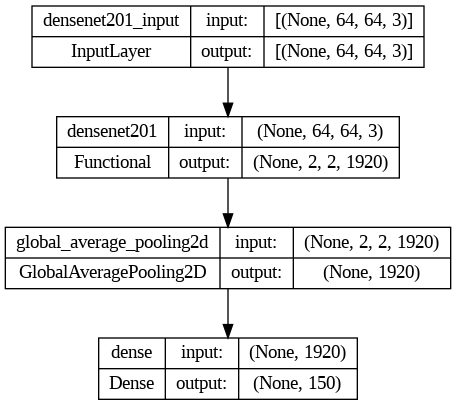

In [ ]:
model.summary()
plot_model(model, show_shapes=True)

Adjusting Hyperparameters

In [ ]:
filepath = 'deep_model.h5'
checkpoint = ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    verbose = 1,
    save_best_only=True,
    mode='max',
    save_weights_only = False
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    verbose=1,
    factor=0.2,
    min_lr=0.0001
)

callbacks_list = [
    checkpoint,
    early_stopping,
    learning_rate_reduction
]

Model Training

In [ ]:
# Train the model
history = model.fit(
        train_generator,
    steps_per_epoch=130,
    batch_size=BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=20,
    verbose = 1,
    epochs = EPOCHS,
    callbacks=callbacks_list
)

Epoch 1/20
129/130 [============================>.] - ETA: 0s - loss: 0.2689 - accuracy: 0.9250
Epoch 1: val_accuracy improved from -inf to 0.94531, saving model to deep_model.h5
130/130 [==============================] - 11s 83ms/step - loss: 0.2679 - accuracy: 0.9256 - val_loss: 0.1820 - val_accuracy: 0.9453 - lr: 1.0000e-04
Epoch 2/20
129/130 [============================>.] - ETA: 0s - loss: 0.2567 - accuracy: 0.9304
Epoch 2: val_accuracy did not improve from 0.94531
130/130 [==============================] - 6s 49ms/step - loss: 0.2562 - accuracy: 0.9304 - val_loss: 0.2190 - val_accuracy: 0.9391 - lr: 1.0000e-04
Epoch 3/20
130/130 [==============================] - ETA: 0s - loss: 0.2510 - accuracy: 0.9275
Epoch 3: val_accuracy did not improve from 0.94531
130/130 [==============================] - 6s 49ms/step - loss: 0.2510 - accuracy: 0.9275 - val_loss: 0.2027 - val_accuracy: 0.9406 - lr: 1.0000e-04
Epoch 4/20
129/130 [============================>.] - ETA: 0s - loss: 0.2236 - 

In [ ]:
scores = model.evaluate(test_generator)

43/43 [==============================] - 2s 38ms/step - loss: 0.5722 - accuracy: 0.8512


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

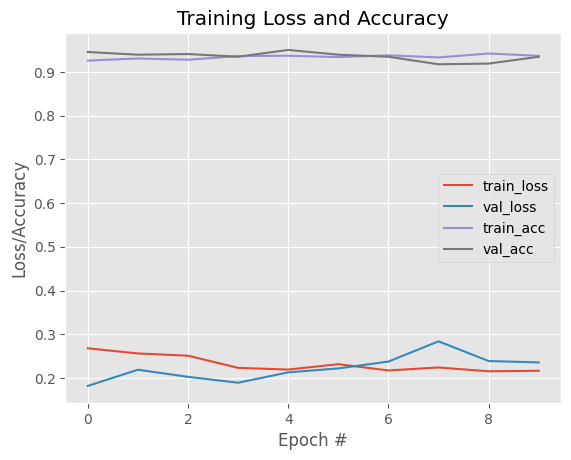

In [ ]:
plt.style.use("ggplot")
N = np.arange(0, 10)
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig('symnet_results.png')

In [ ]:
model.save('final_model.h5')